In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [15]:
image = cv2.imread('/content/drive/MyDrive/phots for utility/WhatsApp Image 2023-12-20 at 19.45.11_af75431c.jpg', cv2.IMREAD_GRAYSCALE)
image_blurred = cv2.GaussianBlur(image, (5, 5), 0)
edges = cv2.Canny(image_blurred, 50, 150)

In [16]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
image_with_lines = image.copy()


In [17]:
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

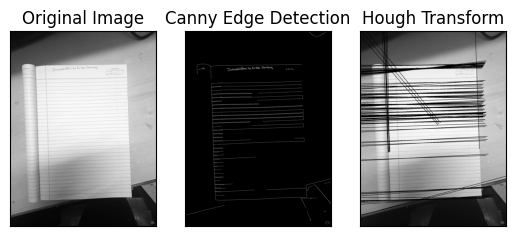

In [18]:
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_with_lines, cmap='gray')
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()